In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from pathlib import Path

In [2]:
# Define directories
DATA_DIR = Path('/home/abdellah-ennajari/Desktop/AI-Powered-Academic-Research-Assistant')
PROCESSED_DIR = DATA_DIR / 'Data/processed'

In [3]:
# Load cleaned data
papers_df = pd.read_csv(PROCESSED_DIR / 'cleaned_papers.csv')

In [4]:
# Ensure the 'year' column is properly formatted
papers_df['year'] = papers_df['year'].astype(int)

# ====================================================
# Trend Analysis: Keyword Frequency Over Time
# ====================================================


In [5]:
# Define a list of keywords to analyze
keywords = [
    'machine learning', 'deep learning', 'natural language processing',
    'computer vision', 'reinforcement learning', 'artificial intelligence'
]

In [6]:
# Initialize a dictionary to store keyword frequencies
keyword_freq = {keyword: [] for keyword in keywords}


In [7]:
# Calculate the frequency of each keyword per year
years = sorted(papers_df['year'].unique())
for year in years:
    yearly_titles = papers_df[papers_df['year'] == year]['title']
    for keyword in keywords:
        count = yearly_titles.str.contains(keyword, case=False, regex=False).sum()
        keyword_freq[keyword].append(count)

In [8]:
# Convert the results to a DataFrame for easier plotting
trend_df = pd.DataFrame(keyword_freq, index=years)


# ====================================================
# Visualizations
# ====================================================

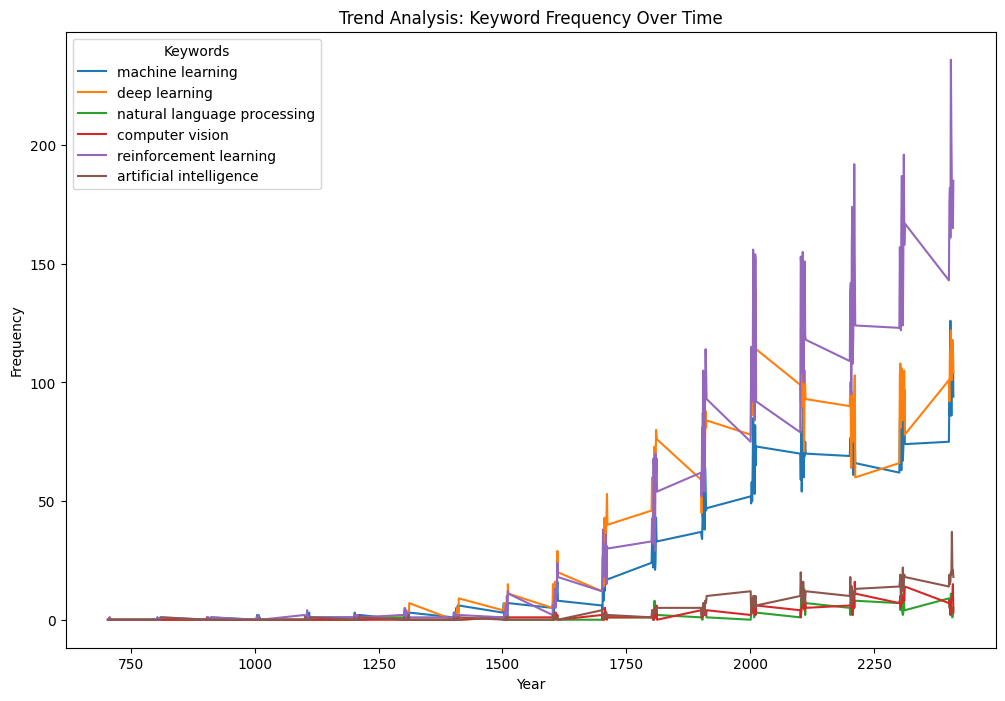

In [9]:
# 1. Line Plot: Keyword Frequency Over Time
plt.figure(figsize=(12, 8))
for keyword in keywords:
    sns.lineplot(x=years, y=trend_df[keyword], label=keyword)
plt.title('Trend Analysis: Keyword Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Keywords')
plt.show()

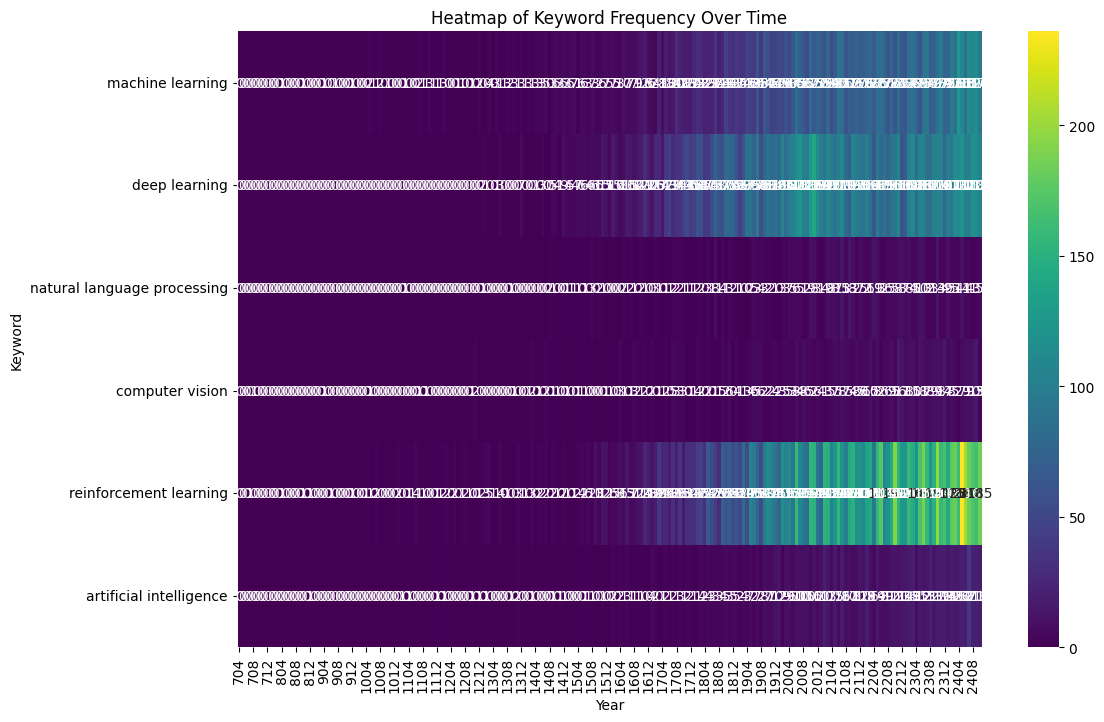

In [10]:
# 2. Heatmap: Keyword Frequency Over Time
plt.figure(figsize=(12, 8))
sns.heatmap(trend_df.T, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Keyword Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Keyword')
plt.show()


# ====================================================
# Save Trend Analysis Results
# ====================================================

In [11]:
# Save the trend analysis results to a CSV file
trend_df.to_csv(PROCESSED_DIR / 'keyword_trends.csv')

print("\nTrend analysis completed and results saved to 'processed' directory.")


Trend analysis completed and results saved to 'processed' directory.
